In [1]:
import numpy as np
from points_in_boxes import get_inds_in_boxes

In [7]:
import numba as nb # <--- Remove if you don't have numba

@nb.njit
def points_which_are_in_ellipsoid(Sigma, mu, pp, tau):
    d = Sigma.shape[-1]
    zz = (pp.reshape((-1,d)) - mu.reshape((1,d))).T
    return (np.sum(zz * np.linalg.solve(Sigma, zz), axis=0) < tau**2)

@nb.njit
def get_inds_in_ellipsoids_brute(Sigmas, mus, pp, tau):
    num_ellipsoids, d, d = Sigmas.shape
    inds_in_ellipsoids = list()
    for i in range(num_ellipsoids):
        inds_in_ith_ellipsoid = np.argwhere(points_which_are_in_ellipsoid(Sigmas[i,:,:], mus[i,:], pp, tau))
        inds_in_ellipsoids.append(inds_in_ith_ellipsoid)
    return inds_in_ellipsoids

# def get_inds_in_ellipsoids

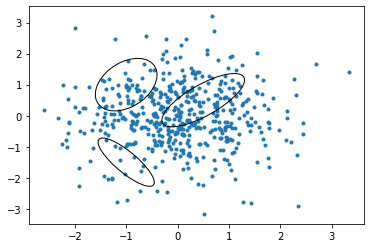

In [8]:
import matplotlib.pyplot as plt
from plot_ellipse import plot_ellipse

pp = np.random.randn(500,2)

mus = np.array([[0.5,   0.5],
               [-1.0, -1.5],
               [-1.0,  1.0]])

num_ellipsoids = mus.shape[0]

Sigmas = np.zeros((num_ellipsoids, 2, 2))
for i in range(num_ellipsoids):
    U, ss, _ = np.linalg.svd(np.random.randn(2,2))
    Sigmas[i,:,:] = np.dot(U, np.dot(np.diag(ss), U.T))
    
tau = 0.75

plt.scatter(pp[:,0], pp[:,1], marker='.')
ax = plt.gca()
for i in range(num_ellipsoids):
    plot_ellipse(ax, mus[i,:], Sigmas[i,:,:], tau)

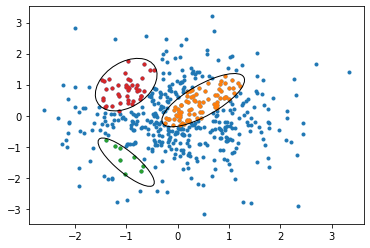

In [9]:
inds_in_ellipsoids = get_inds_in_ellipsoids_brute(Sigmas, mus, pp, tau)

plt.scatter(pp[:,0], pp[:,1], marker='.')
ax = plt.gca()
for i in range(num_ellipsoids):
    inds_in_ith_ellipsoid = inds_in_ellipsoids[i]
    plt.scatter(pp[inds_in_ith_ellipsoid,0], pp[inds_in_ith_ellipsoid,1], marker='.')
    plot_ellipse(ax, mus[i,:], Sigmas[i,:,:], tau)

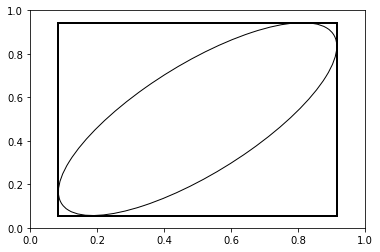

In [11]:
import matplotlib.patches as patches
Sigma = 0.15 * Sigmas[0,:,:]
mu = mus[0,:]

dd = np.diagonal(Sigma)

box_min = mu - np.sqrt(dd)
box_max = mu + np.sqrt(dd)

deltas = box_max - box_min


plt.figure()
ax = plt.gca()
plot_ellipse(ax, mu, Sigma, 1.0)

rect = patches.Rectangle(tuple(box_min), deltas[0], deltas[1], linewidth=2, edgecolor='k',facecolor='none')
ax.add_patch(rect)